[@LorenaABarba](https://twitter.com/LorenaABarba)

##### Version 0.1 -- February 2014

# Infinite row of vortices

This time, you'll be on your own creating the code for this flow!

The objective of this assignement is to visualize the streamlines induced by an infinite row of vortices.
Because the computer does not enable the passage to the limit of an infinite number, we first consider the case of a finite number of vortices.

However, it is possible to derive an analytical expression for the infinite case.

Are the streamlines different from one case to the other?


In this notebook, their is no Python code... not yet! Your job is to read the theory, to think how you could implement it in an efficient manner and finally to code it and visualize the results.

## Vortex flow (from previous lesson)

As seen in a previous lesson, a vortex of strength $\Gamma$ has a stream-function

$$\psi\left(r,\theta\right) = \frac{\Gamma}{2\pi}\ln r$$

and a velocity potential

$$\phi\left(r,\theta\right) = -\frac{\Gamma}{2\pi}\theta$$

From this we can derive the velocity components in a polar coordinate system

$$u_r\left(r,\theta\right) = 0$$

$$u_\theta\left(r,\theta\right) = -\frac{\Gamma}{2\pi r}$$

In a Cartesian system, the velocity components at $\left(x,y\right)$ induced by a vortex, of strength $\Gamma$ located at $\left(x_\text{vortex},y_\text{vortex}\right)$, are given by

$$u\left(x,y\right) = +\frac{\Gamma}{2\pi}\frac{y-y_\text{vortex}}{(x-x_\text{vortex})^2+(y-y_\text{vortex})^2}$$

$$v\left(x,y\right) = -\frac{\Gamma}{2\pi}\frac{x-x_\text{vortex}}{(x-x_\text{vortex})^2+(y-y_\text{vortex})^2}$$

and the stream-function is

$$\psi\left(x,y\right) = \frac{\Gamma}{4\pi}\ln\left((x-x_\text{vortex})^2+(y-y_\text{vortex})^2\right)$$

## Adding many vortices

In this assignement, we consider a useful example to illustrate the concept of a *vortex sheet*: an infinite row of vortices of equal strength $\Gamma$ (same sign and magnitude) evenly spaced by a distance $a$. But let's start with a finite row of vortices first.


The stream-function $\psi_i$ of the $i^{th}$ vortex at a distance $r_i$ is given by:

$$\psi_i = \frac{\Gamma}{2\pi}\ln r_i$$

Applying the principle of superposition, the stream-function of $N$ vortices is, then

$$\psi = \frac{\Gamma}{2\pi} \sum_{i=1}^N \ln r_i$$

And the velocity field (in Cartesian coordinates) of the row of vortices is

$$u\left(x,y\right) = + \frac{\Gamma}{2\pi} \sum_{i=1}^N \frac{y-y_i}{(x-x_i)^2+(y-y_i)^2}$$

$$v\left(x,y\right) = - \frac{\Gamma}{2\pi} \sum_{i=1}^N \frac{x-x_i}{(x-x_i)^2+(y-y_i)^2}$$

where $\left(x_i,y_i\right)$ are the Cartesian coordinates of the $i^{\text{th}}$ vortex.

(In the next section, we'll show you how to derive a closed-form expression for the *infinite* sum of vortices. But hang on.)

<center>![image](files/resources/infiniteRowVorticesSketch.png)</center>

---

##### Task:

#### Compute the velocity field and plot the streamlines of a row of vortices

You will place a $N$ vortices aligned on the horizontal axis and visualize the flow pattern created. Do the following:

* Using the equations derived above, compute the velocity components of each vortex on a mesh grid.

* Remember that a finite number of vortices can be represented by a *list* or a NumPy *array*. Think and decide which one to use.

* Define functions to avoid code repetition  (and why not classes, if you prefer and are familiar with the concept).

* Once you have all the velocities, apply the principle of superposition and plot the resulting flow pattern. 

* Play around with the size of your vortex row and the plotting range. Make your plot of publishable quality!

In the end you should get something similar to this:

<center>![image](files/resources/infiniteRowVortices.png)</center>

## Finite Row of Vortices

In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
NV = 11                               # Number of vortices
a = 0.4                               # Spacing between each vortex

In [4]:
NX = ((NV-1)*a)*50                    # Number of points in x-direction
NY = 50                               # Number of points in y-direction
x_start, x_end = -((NV-1)*a/2), ((NV-1)*a/2)    # x-direction boundaries
y_start, y_end = -0.5, 0.5            # y-direction boundaries
x = np.linspace(x_start, x_end, NX)   # computes a 1D-array for x
y = np.linspace(y_start, y_end, NY)   # computes a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

In [5]:
gamma = 5.0                      # strength of the vortex

In [6]:
x_vortex = np.arange(-((NV-1)*a/2), (((NV-1)*a/2)+a/2), a)    # x-location of vortices
y_vortex = 0.                         # y-location of vortices

In [7]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """Returns the velocity field generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    u = + strength/(2*pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u, v

In [8]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """Returns the stream-function generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    psi = strength/(4*pi)*np.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [9]:
# computes the velocity field on the mesh grid
UVORT, VVORT = 0, 0
for loc_v in x_vortex:
    u_vortex, v_vortex = get_velocity_vortex(gamma, loc_v, y_vortex, X, Y)
    UVORT = UVORT + u_vortex
    VVORT = VVORT + v_vortex
    
# computes the stream-function on the mesh grid
PSIVORT = 0
for loc_v in x_vortex:
    psi_vortex = get_stream_function_vortex(gamma, loc_v, y_vortex, X, Y)
    PSIVORT = PSIVORT + psi_vortex

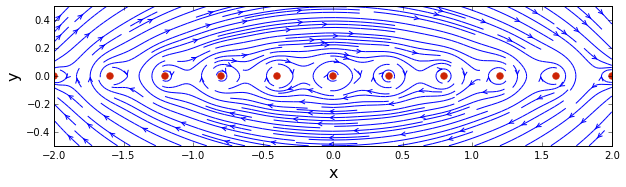

In [11]:
# plots the streamlines
%matplotlib inline

size = 10
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, UVORT, VVORT, density=1.5, linewidth=1, arrowsize=1, arrowstyle='->')
for loc_v in x_vortex:
    plt.scatter(loc_v, y_vortex, color='#CD2305', s=40, marker='o');

---

## Infinite row of vortices

This will be a fun mathematical exercise! Follow along, and take your own notes.

To derive the closed-form functions, we use the complex representation:

$$z = x + jy$$

where $j^2=-1$. (We don't use $i$ to not confuse it with our indices!)

The complex potential is defined as $w = \phi + j\psi$, where $\phi$ is the potential velocity and $\psi$ is the stream-function. If we differentiate the complex potential $w$ with respect to the complex variable $z$, we get the complex velocity

$$\frac{dw}{dz} = u-jv$$

where $u$ and $v$ are the Cartesian velocity components.

The complex potential representing a vortex of strength $\Gamma$ located at the origin is

$$w = \frac{j\Gamma}{2\pi}\ln z$$

Why?

Because $z=re^{j\theta}$ and $w$ becomes

$$w = -\frac{\Gamma}{2\pi}\theta + j\frac{\Gamma}{2\pi}\ln r = \phi + j\psi$$

Consider a second vortex located at $\left(a,0\right)$ with the same strength $\Gamma$. Its complex potential is given by

$$w = \frac{j\Gamma}{2\pi}\ln \left(z-a\right)$$

A additional vortex located $a$ further will have a complex potential of the form

$$w = \frac{j\Gamma}{2\pi}\ln \left(z-2a\right)$$

and so on...

Therefore, the complex potential representing an inifinite row of vortices (on the line $y=0$) is given by

$$w = \frac{j\Gamma}{2\pi}\sum_{m=-\infty}^{+\infty} \ln \left( z-ma \right)$$

When we integrate the velocity components, in the previous notebooks, to find the stream-function and the potential, we dropped the constant of integration. Here, we decide to add a constant (not a random one!). Why not, since the differentiation will give the same results.

$$w = \frac{j\Gamma}{2\pi}\sum_{m=-\infty}^{+\infty} \ln \left( z-ma \right) + \text{constant}$$

where

$$\text{constant} = -\frac{j\Gamma}{2\pi} \sum_{m=-\infty, m\neq 0}^{+\infty} \ln \left( -ma \right)$$

so that, the complex potential can be cast in the following form

$$w = \frac{j\Gamma}{2\pi}\sum_{m=-\infty,m\neq 0}^{+\infty} \ln \left( \frac{z-ma}{-ma} \right) + \frac{j\Gamma}{2\pi}\ln z$$

Now, it is time do some mathematics...

$$w = \frac{j\Gamma}{2\pi}\sum_{m=-\infty,m\neq 0}^{+\infty} \ln \left( 1-\frac{z}{ma} \right) + \frac{j\Gamma}{2\pi}\ln z$$

$$w = \frac{j\Gamma}{2\pi}\sum_{m=1}^{+\infty} \left\lbrace \ln\left(1-\frac{z}{ma}\right) + \ln\left(1+\frac{z}{ma}\right) \right\rbrace + \frac{j\Gamma}{2\pi}\ln z$$

$$w = \frac{j\Gamma}{2\pi}\sum_{m=1}^{+\infty} \ln\left(1-\frac{z^2}{m^2a^2}\right) + \frac{j\Gamma}{2\pi}\ln z$$

$$w = \frac{j\Gamma}{2\pi} \ln\left(\prod_{m=1}^{+\infty}\left(1-\frac{z^2}{m^2a^2}\right)\right) + \frac{j\Gamma}{2\pi}\ln z$$

$$w = \frac{j\Gamma}{2\pi} \ln\left(z\prod_{m=1}^{+\infty}\left(1-\frac{z^2}{m^2a^2}\right)\right)$$

$$w = \frac{j\Gamma}{2\pi} \ln\left(z\prod_{m=1}^{+\infty}\left(1-\frac{\left(\frac{z\pi}{a}\right)^2}{m^2\pi^2}\right)\right)$$

The product is actually the formula for the sine and the complex potential becomes

$$w = \frac{j\Gamma}{2\pi}\ln\left(\sin\left(\frac{z\pi}{a}\right)\right)$$

We derive the complex potential with respect to the complex variable to get the complex velocity

$$\frac{dw}{dz} = u-iv = \frac{j\Gamma}{2a}\cot\left(\frac{z\pi}{a}\right)$$

$$u-jv = \frac{j\Gamma}{2a}\frac{\cos\left(\frac{\pi x}{a}+j\frac{\pi y}{a}\right)}{\sin\left(\frac{\pi x}{a}+j\frac{\pi y}{a}\right)}$$

Applying trigonometric identities, we find the following expression

$$u-jv = \frac{j\Gamma}{2a}\frac{\cos\left(\frac{\pi x}{a}\right)\cosh\left(\frac{\pi y}{a}\right) - j\sin\left(\frac{\pi x}{a}\right)\sinh\left(\frac{\pi y}{a}\right)}{\sin\left(\frac{\pi x}{a}\right)\cosh\left(\frac{\pi y}{a}\right) + j\cos\left(\frac{\pi x}{a}\right)\sinh\left(\frac{\pi y}{a}\right)}$$

which can be cast in the form (try it!)

$$u-jv = \frac{\Gamma}{2a}\frac{\sinh\left(\frac{2\pi y}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right) - \cos\left(\frac{2\pi x}{a}\right)} + j \frac{\Gamma}{2a}\frac{\sin\left(\frac{2\pi x}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right) - \cos\left(\frac{2\pi x}{a}\right)}$$

Therefore, the Cartesian velocity components of an infinite row of vortices are given by

$$u\left(x,y\right) = +\frac{\Gamma}{2a}\frac{\sinh\left(\frac{2\pi y}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right)-\cos\left(\frac{2\pi x}{a}\right)}$$

$$v\left(x,y\right) = -\frac{\Gamma}{2a}\frac{\sin\left(\frac{2\pi x}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right)-\cos\left(\frac{2\pi x}{a}\right)}$$

---

##### Task:

#### Compute the velocity field and plot the streamlines of an *infinite* row of vortices

Now that we have derived the functions for the velocity components, implement them in a code cell and plot the streamlines. 

Can you see any difference with the previous task where the number of vortices was finite?

In [12]:
def get_velocity_infinite_vortex(strength, xv, yv, X, Y):
    """Returns the velocity field generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    u = + strength/(2*a)*np.sinh((2*pi*(Y-yv)/a))/(np.cosh((2*pi*(Y-yv)/a))-np.cos((2*pi*(X-xv))))
    v = - strength/(2*a)*np.sin((2*pi*(X-xv)/a))/(np.cosh((2*pi*(Y-yv)/a))-np.cos((2*pi*(X-xv))))
    
    return u, v

In [13]:
# computes the velocity field on the mesh grid
UVORTi, VVORTi = 0, 0
for loc_v in x_vortex:
    u_vortexi, v_vortexi = get_velocity_infinite_vortex(gamma, loc_v, y_vortex, X, Y)
    UVORTi = UVORTi + u_vortexi
    VVORTi = VVORTi + v_vortexi

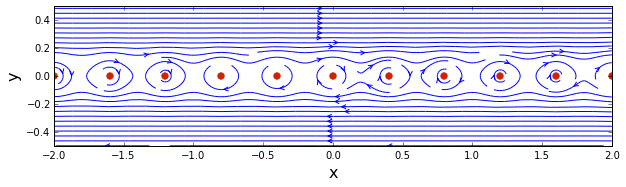

In [14]:
# plots the streamlines
%matplotlib inline

size = 10
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, UVORTi, VVORTi, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
for loc_v in x_vortex:
    plt.scatter(loc_v, y_vortex, color='#CD2305', s=40, marker='o');

---

In [15]:
from IPython.core.display import HTML
def css_styling():
    styles = open('../styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()